# Hamiltonian in Real Space

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math

# the parameters
k, a, t, delta_t = sp.symbols("k a t delta_t", real=True)
N = 100  # Number of unit cells

# creation and annihilation operators
A_creation = [sp.Symbol(f"c_A{i}†") for i in range(1, N+1)]
B_creation = [sp.Symbol(f"c_B{i}†") for i in range(1, N+1)]
A_annihilation = [sp.Symbol(f"c_A{i}") for i in range(1, N+1)]
B_annihilation = [sp.Symbol(f"c_B{i}") for i in range(1, N+1)] 


# Building the Hamiltonian
H = 0
for i in range(N):
    # Add hopping terms between A and B within the same unit cell
    H += (t + delta_t) * A_creation[i] * B_annihilation[i]
    
    # Add hopping terms between B in one cell and A in the next cell (if applicable)
    if i < N - 1:
        H += (t - delta_t) * A_creation[i+1] * B_annihilation[i]

# Hermitian conjugate terms
H_conjugate = 0
for i in range(N):
    # Hermitian conjugate for hopping between A and B
    H_conjugate += (t + delta_t) * A_annihilation[i] * B_creation[i]
    
    # Hermitian conjugate for hopping between B and A
    if i < N - 1:
        H_conjugate += (t - delta_t) * A_annihilation[i+1] * B_creation[i]

# Total Hamiltonian
H += H_conjugate

#display(Math(f"H = {sp.latex(H)}"))


## Matrix representation

In [3]:
# matrix representation of the Hamiltonian
dim = 2 * N  # Total number of basis states
H_matrix_symbolic = sp.zeros(dim, dim)

for i in range(N):
    # Hopping between A_i and B_i
    H_matrix_symbolic[2*i, 2*i+1] = t + delta_t
    H_matrix_symbolic[2*i+1, 2*i] = t + delta_t  # Hermitian conjugate
    
    # Hopping between B_i and A_(i+1)
    if i < N - 1:
        H_matrix_symbolic[2*i+1, 2*(i+1)] = t - delta_t
        H_matrix_symbolic[2*(i+1), 2*i+1] = t - delta_t  # Hermitian conjugate

#display(Math(f"H_{{matrix}} = {sp.latex(H_matrix_symbolic)}"))

## Numeric values

In [4]:
# Convert to a numerical matrix by substituting t and delta_t with specific values
t_value = 1.0  
delta_t_value = -0.3
H_matrix_numeric = np.array(H_matrix_symbolic.subs({t: t_value, delta_t: delta_t_value}).evalf(), dtype=float)

# round to two decimal places
H_matrix_numeric_display = np.round(H_matrix_numeric, 2)

# Create LaTeX-style matrix
latex_matrix = "\\begin{bmatrix} " + " \\\\ ".join(
    [" & ".join([f"{H_matrix_numeric_display[i, j]:.2f}" for j in range(H_matrix_numeric.shape[1])]) for i in range(H_matrix_numeric.shape[0])]) + " \\end{bmatrix}"

#display(Math(latex_matrix))

## Diagonalizing

In [6]:
# eigenvalues and eigenvectors of the Hamiltonian matrix
eigenvalues, eigenvectors = np.linalg.eig(H_matrix_numeric)

# Round to two decimal places
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

# Display eigenvalues and eigenvectors together in LaTeX format
latex_output = ""
for i in range(len(eigenvalues_rounded)):
    # Format each eigenvalue with its corresponding eigenvector as a pair
    eigenvalue_latex = f"{eigenvalues_rounded[i]:.2f}"
    
    # Format the eigenvector as a column vector
    eigenvector_latex = "\\begin{bmatrix} " + " \\\\ ".join([f"{eigenvectors_rounded[j, i]:.2f}" for j in range(eigenvectors_rounded.shape[0])]) + " \\end{bmatrix}"
    
    # Combine eigenvalue and eigenvector together
    latex_output += f"\\text{{Eigenvalue }} {eigenvalue_latex} : {eigenvector_latex} \\\\ "

#display(Math(f"{latex_output}"))


## Edge States

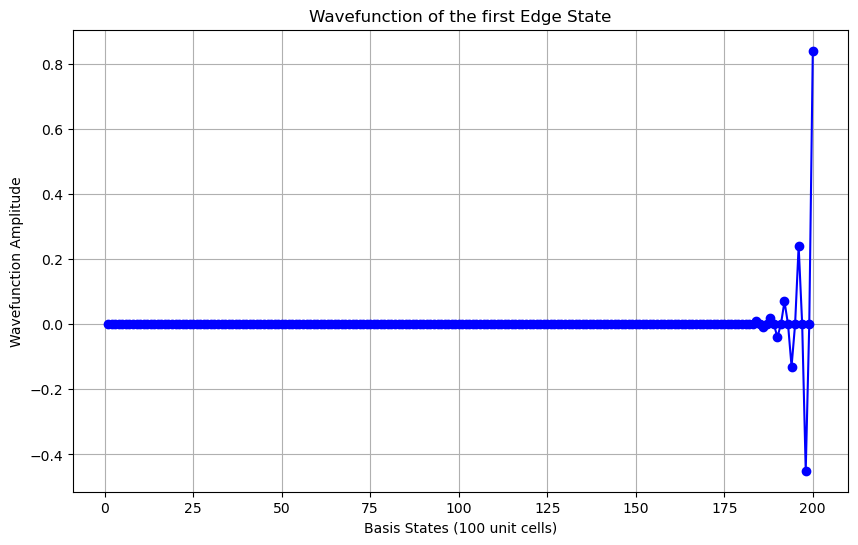

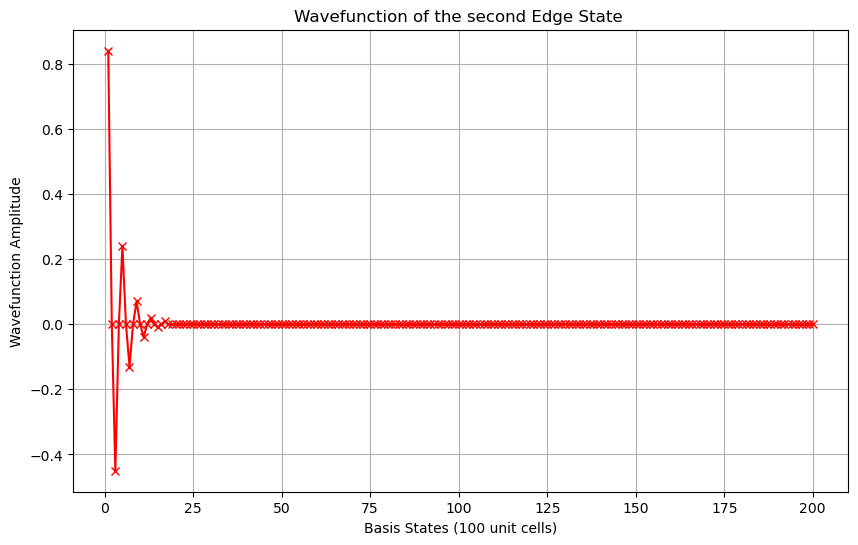

In [6]:
# Find the indices of the two eigenvalues nearest to zero
nearest_indices = np.argsort(np.abs(eigenvalues_rounded))[:2]  # Sort by absolute value and take the first two

# Extract the eigenvalues and corresponding eigenvectors
nearest_eigenvalues = eigenvalues_rounded[nearest_indices]
nearest_eigenvectors = eigenvectors_rounded[:, nearest_indices]

edge_state1 = nearest_eigenvectors[:,0]
edge_state2 = nearest_eigenvectors[:,1]

# basis states 
basis_states = np.arange(1, 2 * N + 1)

# Plot 1
plt.figure(figsize=(10, 6))
plt.plot(basis_states, edge_state1, marker='o', linestyle='-', color='b')
plt.xlabel("Basis States (100 unit cells)")
plt.ylabel("Wavefunction Amplitude")
plt.title("Wavefunction of the first Edge State")
plt.grid(True)
plt.show()

# Plot 2
plt.figure(figsize=(10, 6))
plt.plot(basis_states, edge_state2, marker='x', linestyle='-', color='r')
plt.xlabel("Basis States (100 unit cells)")
plt.ylabel("Wavefunction Amplitude")
plt.title(f"Wavefunction of the second Edge State ")
plt.grid(True)
plt.show()


# Hamiltonian in Momentum Space

In [7]:
# Define the Hamiltonian in momentum space (2x2 matrix)
H_k = sp.Matrix([[0, (t + delta_t) + (t - delta_t) * sp.exp(sp.I * k * a)],
                 [(t + delta_t) + (t - delta_t) * sp.exp(-sp.I * k * a), 0]])

display(Math(f"H_k = {sp.latex(H_k)}"))

<IPython.core.display.Math object>

## Diagonalizing

In [8]:
# Calculate eigenvalues and eigenvectors
eigenvalues = H_k.eigenvals()
eigenvectors = H_k.eigenvects()

# Display eigenvalues and eigenvectors
for eigenvalue, multiplicity, eigenvector_list in eigenvectors:
    display(Math(f"Eigenvalue: {sp.latex(eigenvalue)}"))
    for eigenvector in eigenvector_list:
        display(Math(f"Eigenvector: {sp.latex(eigenvector)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Dispersion relation plotted for different δt

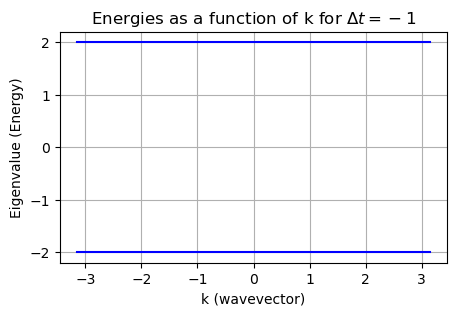

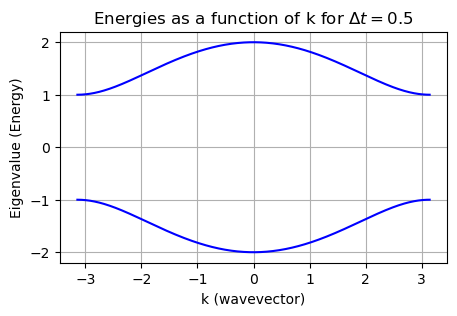

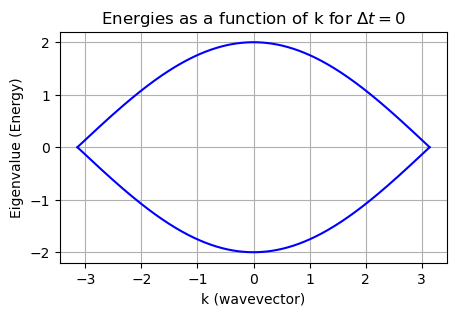

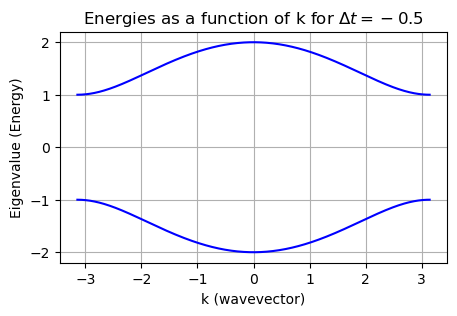

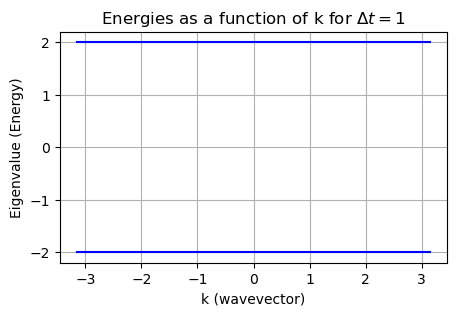

In [9]:
# Define constants
a_value = 1
t_value = 1 

# Function to calculate Hamiltonian matrix numerically
def hamiltonian(k, delta_t, a, t):
    H = np.array([[0, (t + delta_t) + (t - delta_t) * np.exp(1j * k * a)],
                  [(t + delta_t) + (t - delta_t) * np.exp(-1j * k * a), 0]])
    return H

# Function to calculate eigenvalues numerically for a specific k and delta_t
def calculate_eigenvalues(k, delta_t, a, t):
    H_k = hamiltonian(k, delta_t, a, t)
    # Calculate eigenvalues using numpy's eigvals function
    eigenvalues = np.linalg.eigvals(H_k)
    # Return only the real part of eigenvalues (for simplicity)
    return np.real(eigenvalues)

# Values of delta_t to plot
delta_t_values = [-1, 0.5, 0, -0.5, 1]

# k-values for the plot from -pi/a to pi/a
k_vals = np.linspace(-np.pi/a_value, np.pi/a_value, 500)

# Loop over delta_t values and create a separate plot for each
for delta_t_val in delta_t_values:
    plt.figure(figsize=(5, 3))
    eigenvalues_list = [calculate_eigenvalues(k_val, delta_t_val, a_value, t_value) for k_val in k_vals]
    
    # Plot the eigenvalues for the current delta_t
    plt.plot(k_vals, eigenvalues_list, color='b')
    
    # Customize plot for each delta_t
    plt.title(f'Energies as a function of k for $\\Delta t = {delta_t_val}$')
    plt.xlabel('k (wavevector)')
    plt.ylabel('Eigenvalue (Energy)')
    plt.grid(True)
    

    plt.show()

In [15]:
# Define Pauli matrices
sigma_0 = sp.Matrix([[1, 0], [0, 1]])
sigma_x = sp.Matrix([[0, 1], [1, 0]])
sigma_y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sigma_z = sp.Matrix([[1, 0], [0, -1]])

# Compute coefficients d_0, d_x, d_y, d_z
d_0 = (1/2) * sp.trace(H_k * sigma_0)  # Trace projection onto sigma_0
d_x = (1/2) * sp.trace(H_k * sigma_x)  # Trace projection onto sigma_x
d_y = (1/2) * sp.trace(H_k * sigma_y)  # Trace projection onto sigma_y
d_z = (1/2) * sp.trace(H_k * sigma_z)  # Trace projection onto sigma_z

# Simplify the results
d_0 = sp.simplify(d_0)
d_x = sp.simplify(d_x)
d_y = sp.simplify(d_y)
d_z = sp.simplify(d_z)

display(Math(f"d_0 = {sp.latex(d_0)}"))
display(Math(f"d_x = {sp.latex(d_x)}"))
display(Math(f"d_y = {sp.latex(d_y)}"))
display(Math(f"d_z = {sp.latex(d_z)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Trajectories of $\vec{d}(k)$ Over the BZ in the $d_x$-$d_y$ space for different values of $\Delta t$.

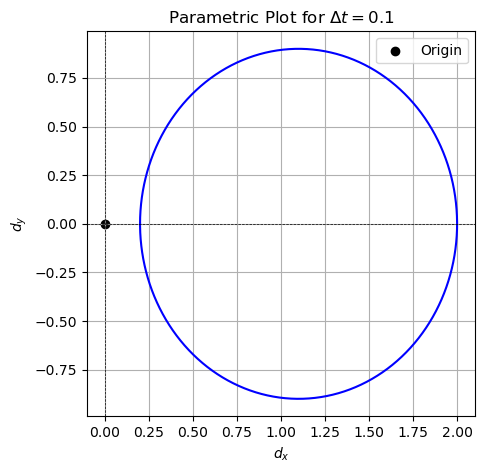

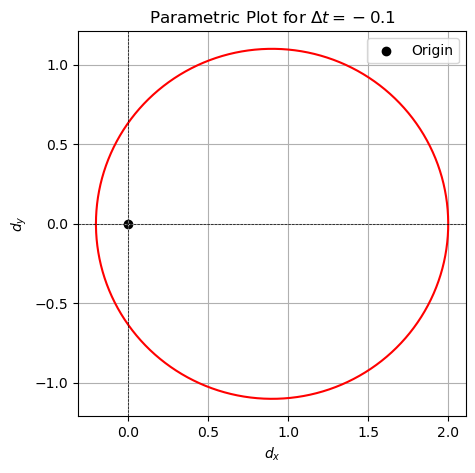

In [17]:
I = sp.I
# Convert symbolic expressions to numerical functions
d_x_func = sp.lambdify((k, a, t, delta_t), d_x, "numpy")
d_y_func = sp.lambdify((k, a, t, delta_t), d_y, "numpy")

a_val = 1
t_val = 1
k_vals = np.linspace(-np.pi / a_val, np.pi / a_val, 500)

# Delta t scenarios
delta_t_values = [0.1, -0.1] 
colors = ['blue', 'red']

# Plot parametric plots
for delta_t_val, color in zip(delta_t_values, colors):
    d_x_vals = d_x_func(k_vals, a_val, t_val, delta_t_val)
    d_y_vals = d_y_func(k_vals, a_val, t_val, delta_t_val)
    
    plt.figure(figsize=(5, 5))
    plt.plot(d_x_vals, d_y_vals, color=color)
    plt.scatter(0, 0, color="black", marker="o", label="Origin")  # Mark the origin
    plt.title(f"Parametric Plot for $\\Delta t = {delta_t_val}$")  # Correct LaTeX formatting
    plt.xlabel("$d_x$")
    plt.ylabel("$d_y$")
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(True)
    plt.legend(loc="upper right")
    plt.show()

## Berry connection

In [18]:
# Extract the first eigenvector (index 0)
first_eigenvector = eigenvectors[0][2][0] 

# Differentiate the first eigenvector with respect to k
first_eigenvector_derivative = sp.diff(first_eigenvector, k)
first_eigenvector_derivative = sp.simplify(sp.diff(first_eigenvector, k))

# Manually compute the conjugate transpose (Hermitian conjugate) by replacing i with -i
first_eigenvector_conjugate_transpose = first_eigenvector.T.applyfunc(lambda elem: elem.subs(sp.I, -sp.I))

# Compute the inner product and extract it as a scalar
inner_product_matrix = first_eigenvector_conjugate_transpose * first_eigenvector_derivative
inner_product_scalar = sp.simplify(inner_product_matrix[0, 0])  # Extract the scalar entry

# Define the Berry connection as a scalar function
Berry_connection = -sp.I * inner_product_scalar

display(Math(f"A(k) = {sp.latex(Berry_connection)}"))

<IPython.core.display.Math object>

In [20]:
from scipy.integrate import quad
from sympy import Rational,N
e = sp.symbols('e')

# Case 1: delta_t < 0
A_k_delta_t_neg = sp.simplify(Berry_connection.subs({t: 1, delta_t: -0.2, a: 1}))
A_k_delta_t_neg_func = sp.lambdify(k, A_k_delta_t_neg, 'numpy')
BZ_integral_neg, _ = quad(A_k_delta_t_neg_func, -np.pi, np.pi)  
polarization_neg = (e / (2 * sp.pi.evalf())) * BZ_integral_neg

# Case 2: delta_t > 0
A_k_delta_t_pos = sp.simplify(Berry_connection.subs({t: 1, delta_t: 0.2, a: 1}))
A_k_delta_t_pos_func = sp.lambdify(k, A_k_delta_t_pos, 'numpy')
BZ_integral_pos, _ = quad(A_k_delta_t_pos_func, -np.pi, np.pi)  # Extract the integral value
if abs(BZ_integral_pos) < 1e-10:
    BZ_integral_pos = 0
polarization_pos = (e / (2 * sp.pi)) * BZ_integral_pos


display(Math(r"Polarization\ when\ \delta_t > 0 = " + sp.latex(polarization_pos)))
display(Math(r"Polarization\ when\ \delta_t < 0 = " + sp.latex(polarization_neg)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>